In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_excel(r"C:\Users\shita\Downloads\telcom_data (1).xlsx")
df.head(5)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


# Task 2:-

# Engagement metrics:- 




# Sessions frequency 

In [6]:
session_frequency = df.groupby(by=['MSISDN/Number'])['Dur. (ms)'].transform('count')

In [7]:
len(session_frequency)

150001

# The duration of the session 


In [8]:
Session_Duration = df['Dur. (ms)']

len(Session_Duration)

150001

# The session total traffic (download and upload (bytes))



In [9]:
total_traffic = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

len(total_traffic)

150001

Task 2.1 - Based on the above submit the Python script and slide:


# Task 2.1.1 Aggregate the above metrics per customer id (MSISDN) and reportthe top 
#10 customers per engagement metric 

In [10]:
# Calculate engagement metrics: total data usage and session duration

df['Total Data Usage'] = df['Total UL (Bytes)'] + df['Total DL (Bytes)']
df['Session Duration'] = df['Dur. (ms)']

# Group the data by customer ID (MSISDN) and calculate sum of engagement metrics
grouped_data = df.groupby('MSISDN/Number').agg({
    'Total Data Usage': 'sum',
    'Session Duration': 'sum'
})

# Sort the customers based on the engagement metric in descending order
sorted_data = grouped_data.sort_values(by='Total Data Usage', ascending=False)

# top 10 customers
top_10_customers = sorted_data.head(10)

print(top_10_customers)   

               Total Data Usage  Session Duration
MSISDN/Number                                    
3.361489e+10       8.846226e+09         9966898.0
3.376054e+10       8.514774e+09         9279434.0
3.362578e+10       8.499621e+09        18553754.0
3.362632e+10       7.971167e+09         8791927.0
3.367588e+10       7.891111e+09         4865947.0
3.365973e+10       7.705863e+09         4035428.0
3.366646e+10       7.308501e+09         4536757.0
3.376041e+10       7.132371e+09         5321667.0
3.366471e+10       6.872018e+09         2927785.0
3.369879e+10       6.540899e+09         5169128.0


# task 2.1.2 Normalize each engagement metric and run a k-means (k=3) to classify customers into three groups of engagement. 


In [11]:
#Import the scikit-learn library


from sklearn.cluster import KMeans               # KMeans used for clustering data into groups.
from sklearn.preprocessing import MinMaxScaler   # MinMaxScaler is used for scaling features.
from sklearn.impute import SimpleImputer         # SimpleInputer is used for handling missing values.

# Select the engagement metrics for clustering
engagement_metrics = ['Total Data Usage', 'Session Duration']

# Handle missing values by imputing with the mean value
imputer = SimpleImputer(strategy='mean')

df[engagement_metrics] = imputer.fit_transform(df[engagement_metrics])

# Normalize the engagement metrics using Min-Max scaling
scaler = MinMaxScaler()

data_scaled = scaler.fit_transform(df[engagement_metrics])

# Run k-means clustering (k=3)               
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original data
df['Cluster'] = kmeans.labels_

# Print the cluster assignments for each customer
print(df[['MSISDN/Number', 'Cluster']])

        MSISDN/Number  Cluster
0        3.366496e+10        0
1        3.368185e+10        1
2        3.376063e+10        0
3        3.375034e+10        1
4        3.369980e+10        2
...               ...      ...
149996   3.365069e+10        2
149997   3.366345e+10        1
149998   3.362189e+10        2
149999   3.361962e+10        2
150000            NaN        2

[150001 rows x 2 columns]


# Task 2.1.3 Compute the minimum, maximum, average & total non-normalized metrics for each cluster. Interpret yourresults visually
#with accompanying text explaining your findings.

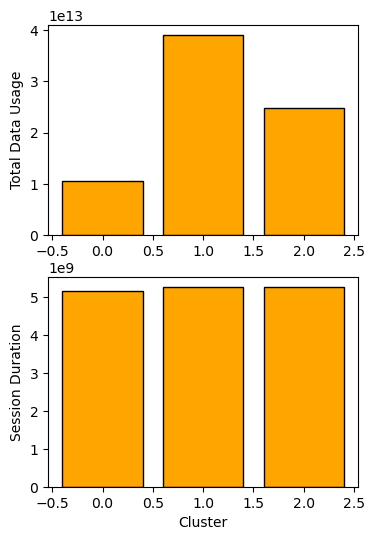

        Total Data Usage                                           \
                     min          max          mean           sum   
Cluster                                                             
0             28956107.0  352053515.0  2.118703e+08  1.047402e+13   
1            634329866.0  955984776.0  7.764760e+08  3.913439e+13   
2            352054834.0  634383829.0  4.935070e+08  2.475678e+13   

        Session Duration                                          
                     min        max           mean           sum  
Cluster                                                           
0                 7189.0  1859336.0  104515.446962  5.166826e+09  
1                 7146.0  1859327.0  104494.571091  5.266526e+09  
2                 7142.0  1772931.0  104814.843847  5.258037e+09  


In [13]:
# Compute minimum, maximum, average, and total non-normalized metrics for each cluster

cluster_metrics = df.groupby('Cluster')[engagement_metrics].agg(['min', 'max', 'mean', 'sum'])



# Plot the metrics summary
fig, axes = plt.subplots(len(engagement_metrics), 1, figsize=(4, 6))

for i, metric in enumerate(engagement_metrics):
    
    axes[i].bar(cluster_metrics.index, cluster_metrics[metric]['sum'], color='orange',ec ='black')
    
    axes[i].set_ylabel(metric)
    
plt.xlabel('Cluster')

plt.show()

# Print the cluster metrics 
print(cluster_metrics)

This code will compute the minimum, maximum, average (mean), and total (sum) values for each non-normalized metric

within each cluster. The resulting DataFrame will show these metrics for each cluster separately.

Interpreting the results visually and in text can be done by creating visualizations like bar plots, box plots, or line 

plots to compare the metrics across clusters. For instance, you could create a bar plot to visualize the average

(mean) values of each metric for each cluster.

Here are some potential observations you might make:

Cluster Comparison: Look for clusters that significantly differ in their engagement metrics. For instance, Cluster 1 
    
                      might have higher maximum values across all metrics compared to Cluster 0 and Cluster 2.

Outliers: Identify clusters with extreme values (high or low) for specific metrics. Anomalies might indicate a unique
     
          segment of customers with distinct engagement behaviors.

Cluster Homogeneity: Assess if the clusters are internally consistent. If Cluster 2 consistently shows lower values 
    
                    across all metrics compared to others, it might represent a less engaged group.

Pattern Recognition: Look for patterns, such as one cluster having consistently higher minimum and maximum values but lower
    
                   average values, which might indicate sporadic high engagement rather than consistent engagement.

# Task 2.1 4 Aggregate user total traffic per application and derive the top 10 most engaged users per application


In [23]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [15]:
# Define the list of applications to aggregate

apps = ['Social Media DL (Bytes)','Social Media UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)','Email UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)','Gaming DL (Bytes)','Gaming UL (Bytes)', 'Other DL (Bytes)','Other UL (Bytes)']

# Calculate the total traffic per application for each user
total_traffic_user = df.groupby('MSISDN/Number')[apps].sum()

# Derive the top 10 most engaged users per application
top10_apps = {}

for i in apps:
    top10_apps[i] = total_traffic_user.nlargest(10, i)

# Print the top 10 most engaged users per application

for i, top_10_users in top10_apps.items():
    
    print(f"Top 10 users for {i}:")
    
    print(top_10_users)

Top 10 users for Social Media DL (Bytes):
               Social Media DL (Bytes)  Social Media UL (Bytes)  \
MSISDN/Number                                                     
3.362632e+10                42743837.0                 630942.0   
3.376054e+10                39297646.0                 485543.0   
3.365973e+10                34900444.0                 511914.0   
3.361489e+10                27749744.0                 544800.0   
3.362578e+10                26564121.0                 571379.0   
3.366716e+10                23753753.0                 494097.0   
3.378632e+10                23568655.0                 406264.0   
3.366907e+10                23477047.0                 323787.0   
3.360313e+10                22776679.0                 301146.0   
3.365849e+10                22695673.0                 304393.0   

               Google DL (Bytes)  Google UL (Bytes)  Email DL (Bytes)  \
MSISDN/Number                                                           
3.36263

# Task 2.1.5 Plot the top 3 most used applications using appropriate charts.

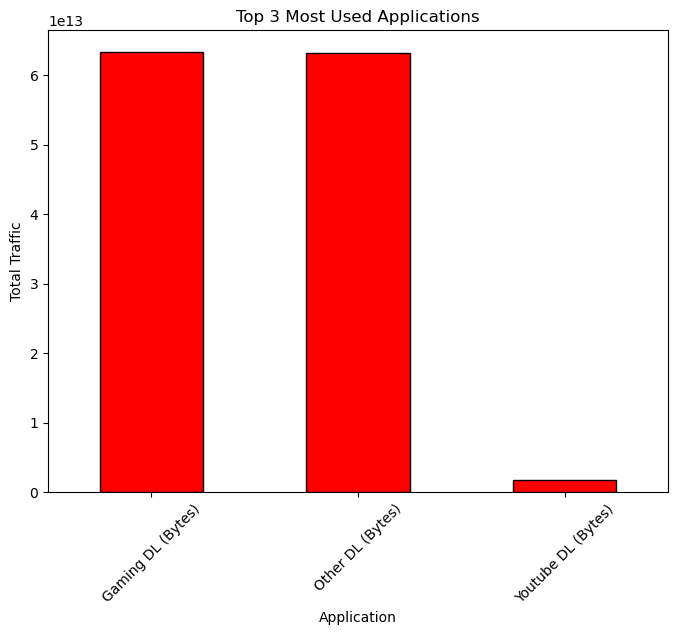

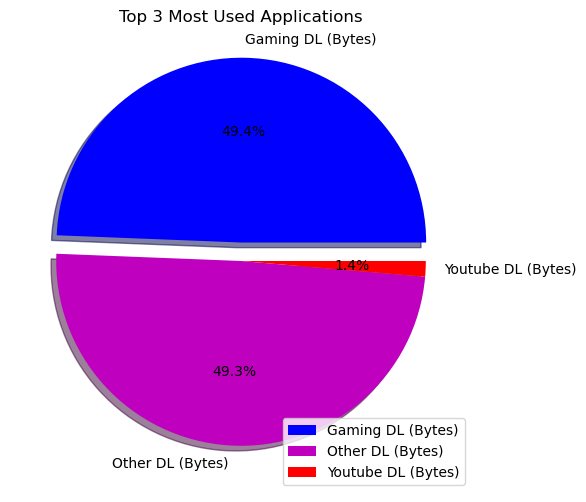

In [24]:
# Calculate the total traffic per application

total_traffic_per_application = df[apps].sum()

# Get the top 3 most used applications

top3_applications = total_traffic_per_application.nlargest(3)

# Plot as a bar plot

plt.figure(figsize=(8, 6))
top3_applications.plot(kind='bar',color = 'red',ec ='black')

plt.xlabel('Application')
plt.ylabel('Total Traffic')

plt.title('Top 3 Most Used Applications')
plt.xticks(rotation=45)

plt.show()

# Plot as a pie chart

plt.figure(figsize=(6, 6))

my_explode = [0.1, 0, 0]

my_colors = ["b", "m", "r"]

top3_applications.plot(kind='pie', autopct='%1.1f%%',shadow =True,explode=my_explode, colors=my_colors)

plt.title('Top 3 Most Used Applications')


plt.legend()
plt.show()

# Task 2.1.6 Using the k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics: 


Optimized value of K using Albow Method

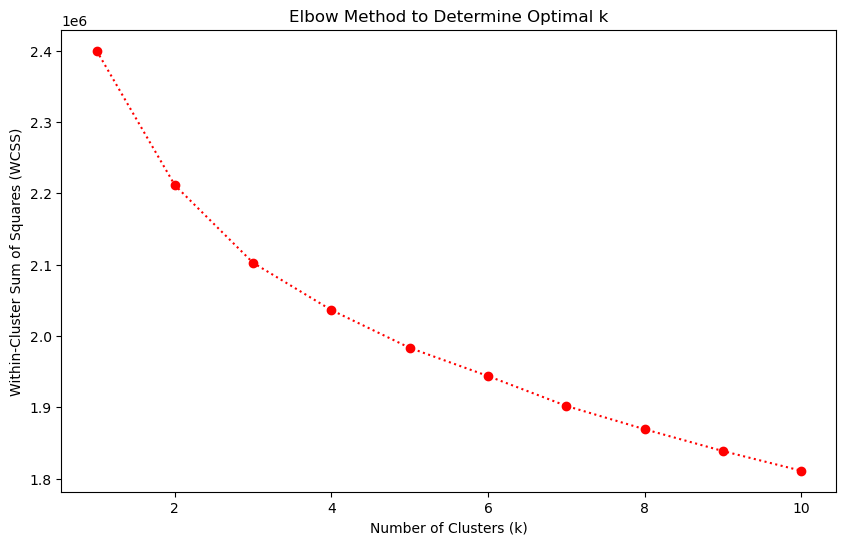

In [58]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Select the engagement metrics for clustering
engagement_metrics = ['Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Social Media DL (Bytes)',
                      
                      'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
                      
                      'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)',
                      
                      'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)']

# Drop any rows with missing values in engagement metrics
df_cleaned = df.dropna(subset=engagement_metrics)

# Imput missing values in the engagement metrics using mean 
imputer = SimpleImputer(strategy='mean')

df_cleaned[engagement_metrics] = imputer.fit_transform(df_cleaned[engagement_metrics])

# data Standardization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned[engagement_metrics])

# Initialize the list to store the values of WCSS
wcss = []

# Calculate WCSS for different values of k
for k in range(1, 11):
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    kmeans.fit(df_scaled)
    
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))

plt.plot(range(1, 11), wcss, marker='o', linestyle=':', color='r')

plt.xlabel('Number of Clusters (k)')

plt.ylabel('Within-Cluster Sum of Squares (WCSS)')

plt.title('Elbow Method to Determine Optimal k')

plt.show()


# Task 2.1.7 What is the optimized value of k (use the elbow method for this)? Interpret your findings. 

The elbow method is a common technique to determine the optimal number of clusters (k) in k-means clustering. By plotting

the within-cluster sum of squares (WCSS) against different values of k, we can identify the "elbow" point where the rate

of decrease in WCSS slows down significantly. This point indicates the optimal value of k, where adding more clusters does

not provide much improvement.